In [1]:
import joblib
import numpy as np

In [2]:
file_path = 'variables_ckks.pkl'

data = joblib.load(file_path)

weights_unenc_ckks, bias_unenc_ckks, accuracy_ckks, y_pred_unenc_ckks, cpu_seconds_ckks, cpu_usages_ckks, ram_usages_ckks, train_time_ckks, testing_time_ckks = data

In [3]:
file_path = 'variables_sklearn.pkl'

data = joblib.load(file_path)

weights_unenc_sklearn, bias_unenc_sklearn, accuracy_sklearn, y_pred_unenc_sklearn, cpu_seconds_sklearn, cpu_usages_sklearn, ram_usages_sklearn, train_time_sklearn, testing_time_sklearn = data

In [4]:
file_path = 'variables_paillier.pkl'

data = joblib.load(file_path)

weights_unenc_paillier, bias_unenc_paillier, accuracy_paillier, y_pred_unenc_paillier, cpu_seconds_paillier, cpu_usages_paillier, ram_usages_paillier, train_time_paillier, testing_time_paillier = data

In [5]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_ckks)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9943534726143423
P-value: 5.808566888271738e-21


In [6]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_ckks)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5.1192191389777765e-05


In [7]:
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_paillier)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9943534726143423
P-value: 5.808566888271738e-21


In [8]:
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_paillier)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5.1193921853202913e-05


In [9]:
weights_unenc_ckks

[0.051887299914134676,
 0.17144880003715082,
 -0.0057666987478693504,
 0.15976319612628764,
 -0.07601849983269088,
 0.048857499474529956,
 -0.02354850009519599,
 0.06854990066561295,
 0.30710759801523235,
 0.1191729018724693,
 0.20599559869566095,
 0.22170639933142128,
 0.12532019987840498,
 0.10894040100972308,
 0.12743279870873525,
 0.09369479911743384,
 0.10432339880585284,
 -0.06418190086707574,
 -0.08080220082984511,
 -0.15544520030384062,
 -0.21741869958546278,
 -0.05577140175003003]

In [10]:
weights_unenc_sklearn

array([ 0.04221419,  0.16517901,  0.00899523,  0.15499459, -0.08110376,
        0.05548127, -0.0150541 ,  0.05787669,  0.30271281,  0.11823241,
        0.20275669,  0.22563433,  0.13273613,  0.11150651,  0.12121017,
        0.1038654 ,  0.10288745, -0.05451912, -0.0696357 , -0.16059388,
       -0.21796863, -0.05546508])

In [11]:
weights_unenc_paillier

[0.051886735571883086,
 0.1714497753668306,
 -0.0057665946938208045,
 0.15976457361858046,
 -0.07601583683946354,
 0.04885833600882438,
 -0.023547714002747785,
 0.06855190482941072,
 0.30710833152915923,
 0.11917361360165608,
 0.20599591997527392,
 0.22170395612466987,
 0.1253191704947564,
 0.10893905368064416,
 0.12743419941990247,
 0.09369651790046694,
 0.10432305909326618,
 -0.06417983514479526,
 -0.08080141484123678,
 -0.15544470050991244,
 -0.21741772767752168,
 -0.05577099079857075]

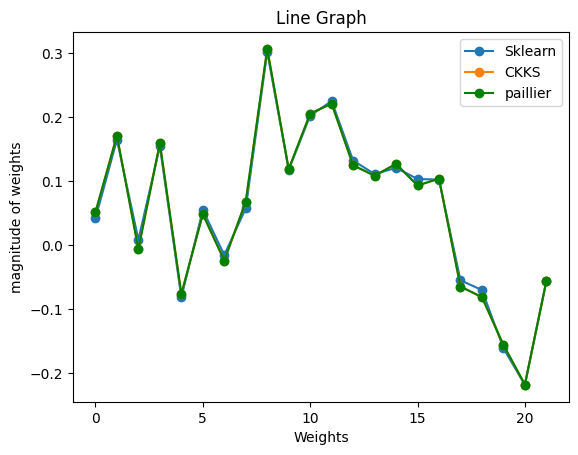

In [12]:
import matplotlib.pyplot as plt

plt.plot(weights_unenc_sklearn, label='Sklearn', marker='o')  
plt.plot(weights_unenc_ckks, label='CKKS', marker='o')  
plt.plot(weights_unenc_paillier, label='paillier', marker='o', color='green')  

plt.xlabel('Weights')
plt.ylabel('magnitude of weights')
plt.title('Line Graph')

plt.legend()

plt.show()

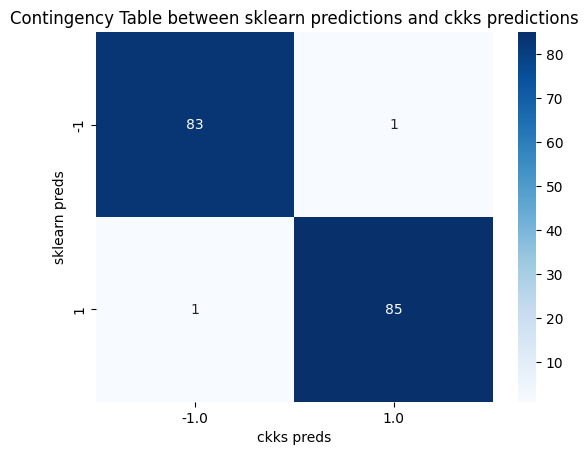

In [13]:
import seaborn as sns
import pandas as pd
data = {'sklearn_preds': y_pred_unenc_sklearn, 'ckks_preds': y_pred_unenc_ckks}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['ckks_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('ckks preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and ckks predictions')

plt.show()

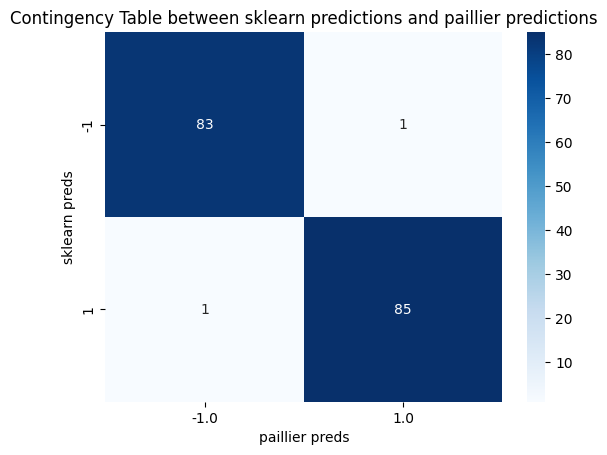

In [14]:

data = {'sklearn_preds': y_pred_unenc_sklearn, 'paillier_preds': y_pred_unenc_paillier}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['paillier_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('paillier preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and paillier predictions')

plt.show()

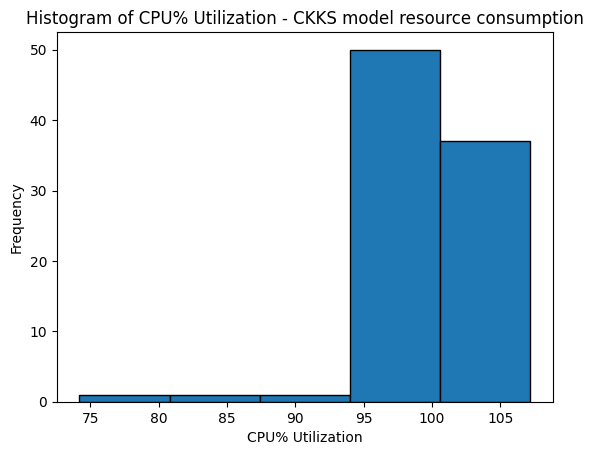

In [15]:
# Plot the histogram

filtered_ckks_cpu_util = [x for x in cpu_usages_ckks if x >= 70]

plt.hist(filtered_ckks_cpu_util, bins=5, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% Utilization - CKKS model resource consumption')
plt.xlabel('CPU% Utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [16]:
print(np.mean(filtered_ckks_cpu_util))
print(np.median(filtered_ckks_cpu_util))

99.60555555555555
100.0


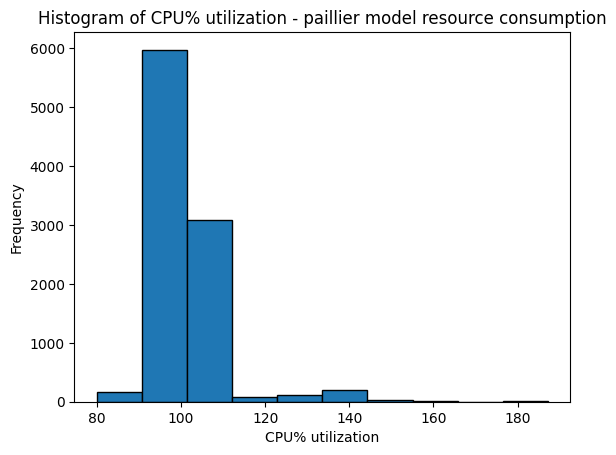

In [17]:
# Plot the histogram

filtered_paillier_cpu_util = [x for x in cpu_usages_paillier if x >= 80]

plt.hist(filtered_paillier_cpu_util, bins=10, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% utilization - paillier model resource consumption')
plt.xlabel('CPU% utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [18]:
np.mean(filtered_paillier_cpu_util)

101.44323623924535

Text(0.5, 1.0, 'Line Graph of ram% util for ckks model')

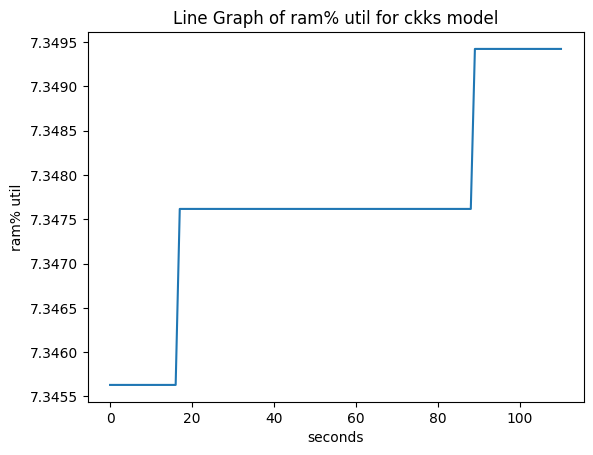

In [19]:
plt.plot(ram_usages_ckks)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for ckks model')

In [20]:
import numpy as np
np.mean(ram_usages_ckks)

7.347669946225598

Text(0.5, 1.0, 'Line Graph of ram% util for paillier model')

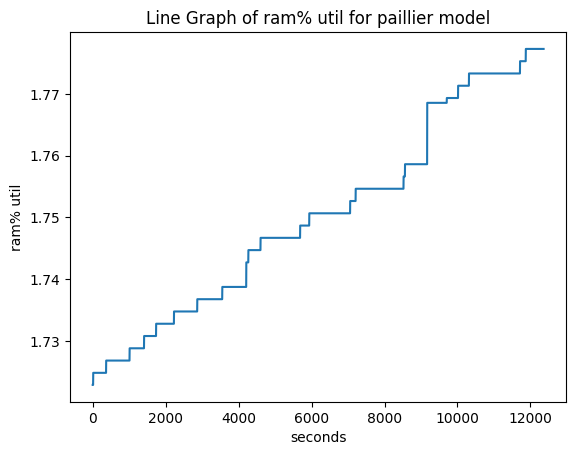

In [21]:
plt.plot(ram_usages_paillier)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for paillier model')

In [22]:
np.mean(ram_usages_paillier)

1.7504416750635037

In [23]:
np.mean(ram_usages_sklearn)

1.600276649733207

In [24]:
train_time_ckks

99.2477343082428

In [25]:
train_time_paillier

12338.389948368073

In [26]:
testing_time_ckks

4.887613296508789

In [27]:
testing_time_paillier

559.7123019695282

In [28]:
accuracy_ckks, accuracy_sklearn, accuracy_paillier

(0.7941176470588235, 0.7941176470588235, 0.7941176470588235)